<a href="https://colab.research.google.com/github/daanish-manivannan/MOTI/blob/main/MOTI_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MOTI Implementation


## Dependencies

In [ ]:
!pip install transformers nltk googletrans==4.0.0rc1 langdetect tqdm   # Install libraries

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=11a0a571a91e2eed95cfcd94637375f5e7eab89c6703031d2828e9c2975190b9
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
  Cr

## Importing Libraries

In [ ]:
from transformers import pipeline
import re
from nltk.corpus import stopwords
from googletrans import Translator
from langdetect import detect
from tqdm.notebook import tqdm

## File Upload

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
file=files.upload()

Saving mlma_merged_2 v1.csv to mlma_merged_2 v1.csv


In [ ]:
file=pd.read_excel("/content/mlma_merged_2 v1.csv")

### File preview

In [ ]:
file

,HITId,username,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,sheezy0,If America had another 8 years of Obama's ideo...,Negative,indirect,anger_fear_shock_sadness_disgust,origin,other
1,2,DavdBurnett,Most Canadians have never met seen or associat...,Negative,indirect,sadness_indifference,disability,special_needs
2,3,lwtprettylaugh,Hahaha grow up faggot @URL,Negative,indirect,shock_disgust,sexual_orientation,women
3,4,douggarland,@user queue is fucking retarded it makes every...,Negative,direct,shock_disgust,disability,special_needs
4,5,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...,Negative,indirect,shock_disgust,origin,other
...,...,...,...,...,...,...,...,...
13009,13012,sk__671,@user يمشي بخطا ادارتها قيد من الأمريكان ونهب ...,Negative,direct,sadness,origin,other
13010,13013,khalidrafiq138,@user مهما حصل هندوس عليهم شويه الرويبضه بس نخ...,Negative,indirect,anger_indifference,other,other
13011,13014,BSTEEZY_,الكلب لا يعض اذن اخوه كذابين خنازير @url,Negative,indirect,disgust,other,other
13012,13015,SustainableUKY,@user لأنه صغير ويكتب في قناة خنازير فلن نقرأ ...,Negative,indirect,shock,other,other


## FIle pre Processing


In [ ]:
# prompt: Using dataframe file: use only column tweets and username and remove all other columns

File = file[['username', 'tweet']]
File

,username,tweet
0,sheezy0,If America had another 8 years of Obama's ideo...
1,DavdBurnett,Most Canadians have never met seen or associat...
2,lwtprettylaugh,Hahaha grow up faggot @URL
3,douggarland,@user queue is fucking retarded it makes every...
4,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...
...,...,...
13009,sk__671,@user يمشي بخطا ادارتها قيد من الأمريكان ونهب ...
13010,khalidrafiq138,@user مهما حصل هندوس عليهم شويه الرويبضه بس نخ...
13011,BSTEEZY_,الكلب لا يعض اذن اخوه كذابين خنازير @url
13012,SustainableUKY,@user لأنه صغير ويكتب في قناة خنازير فلن نقرأ ...


In [ ]:
# prompt: Using dataframe file: convert file to df

df = pd.DataFrame(File)
df

,username,tweet
0,sheezy0,If America had another 8 years of Obama's ideo...
1,DavdBurnett,Most Canadians have never met seen or associat...
2,lwtprettylaugh,Hahaha grow up faggot @URL
3,douggarland,@user queue is fucking retarded it makes every...
4,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...
...,...,...
13009,sk__671,@user يمشي بخطا ادارتها قيد من الأمريكان ونهب ...
13010,khalidrafiq138,@user مهما حصل هندوس عليهم شويه الرويبضه بس نخ...
13011,BSTEEZY_,الكلب لا يعض اذن اخوه كذابين خنازير @url
13012,SustainableUKY,@user لأنه صغير ويكتب في قناة خنازير فلن نقرأ ...


## Translation Process

### Stop Words Importation from nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###GoogleTrans Object

In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
# Checking the translator object and its function
#type(translator)
#dir(translator)

### For 2000 entries

In [ ]:
Tfile=file.head(2000)

In [ ]:
Tfile

,HITId,username,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,sheezy0,If America had another 8 years of Obama's ideo...,Negative,indirect,anger_fear_shock_sadness_disgust,origin,other
1,2,DavdBurnett,Most Canadians have never met seen or associat...,Negative,indirect,sadness_indifference,disability,special_needs
2,3,lwtprettylaugh,Hahaha grow up faggot @URL,Negative,indirect,shock_disgust,sexual_orientation,women
3,4,douggarland,@user queue is fucking retarded it makes every...,Negative,direct,shock_disgust,disability,special_needs
4,5,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...,Negative,indirect,shock_disgust,origin,other
...,...,...,...,...,...,...,...,...
1995,1996,phenokage,@user Because people rather be called spic the...,Negative,indirect,confusion_sadness_shock_indifference_disgust,origin,other
1996,1997,Jwood907,where are @user glasses from so i can steal th...,Negative,indirect,confusion_sadness_shock_indifference_disgust,gender,women
1997,1998,7clarkyred,Your best dj the black negro tenia que ser @URL,Positive,indirect,confusion_sadness_shock_indifference_disgust,origin,special_needs
1998,1999,LeeEliz,Lol all you do on dva is eat stuff kill someon...,Negative,indirect,anger_indifference,disability,special_needs


In [ ]:
df=df.head(2000)

In [ ]:
df

,username,tweet
0,sheezy0,If America had another 8 years of Obama's ideo...
1,DavdBurnett,Most Canadians have never met seen or associat...
2,lwtprettylaugh,Hahaha grow up faggot @URL
3,douggarland,@user queue is fucking retarded it makes every...
4,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...
...,...,...
1995,phenokage,@user Because people rather be called spic the...
1996,Jwood907,where are @user glasses from so i can steal th...
1997,7clarkyred,Your best dj the black negro tenia que ser @URL
1998,LeeEliz,Lol all you do on dva is eat stuff kill someon...


### Translation and processing in DF

In [ ]:
import pandas as pd

from tqdm import tqdm

tweets = []
languages = []

# Assuming you have a 'translator' object initialized for translation
for tweet in tqdm(df["tweet"], desc="Translating Tweets", unit="tweet"):
  if tweet:
    try:
      result = translator.detect_legacy(tweet)
      language = result.lang if result.lang != "en" else "en"  # Handle English detection
      languages.append(language)

      if language != "en":  # Translate if not English
        translated_text = translator.translate(tweet, dest="en").text
        tweets.append(translated_text)
      else:
        tweets.append(tweet)  # No translation for English
    except Exception as e:  # Handle potential translation errors
      print(f"Translation error for tweet: {tweet}")
      tweets.append(tweet)  # Append original tweet on error
      languages.append("error")  # Indicate error for language detection
  else:
    continue  # Skip empty tweets

# Create DataFrame with translated text and language information
df1 = pd.DataFrame({"usernames": df["username"] ,"original_tweet": df["tweet"], "translated_text": tweets, "language": languages})

# Now you have a DataFrame 'df1' for further analysis

Translating Tweets: 100%|██████████| 2000/2000 [07:57<00:00,  4.19tweet/s]


In [ ]:
df1 = pd.DataFrame({"usernames": df["username"] ,"original_tweet": df["tweet"], "translated_text": tweets, "language": languages})

# Now you have a DataFrame 'df' for further analysis

In [ ]:
df1

,usernames,original_tweet,translated_text,language
0,sheezy0,If America had another 8 years of Obama's ideo...,If America had another 8 years of Obama's ideo...,en
1,DavdBurnett,Most Canadians have never met seen or associat...,Most Canadians have never met seen or associat...,en
2,lwtprettylaugh,Hahaha grow up faggot @URL,Hahaha grow up faggot @URL,en
3,douggarland,@user queue is fucking retarded it makes every...,@user queue is fucking retarded it makes every...,en
4,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...,@user that these are not Burundian refugeies a...,fr
...,...,...,...,...
1995,phenokage,@user Because people rather be called spic the...,@user Because people rather be called spic the...,en
1996,Jwood907,where are @user glasses from so i can steal th...,where are @user glasses from so i can steal th...,en
1997,7clarkyred,Your best dj the black negro tenia que ser @URL,Your best dj the black negro tenia que ser @URL,en
1998,LeeEliz,Lol all you do on dva is eat stuff kill someon...,Lol all you do on dva is eat stuff kill someon...,en


### Cleaning by taking NLP Pre processing

In [ ]:
def preprocess_text(text):
  text = text.lower()  # Lowercase conversion
  text = re.sub(r"[^a-zA-Z0-9 ]", "", text)  # Remove punctuation
  stop_words = stopwords.words("english")
  text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stop words
  return text

In [ ]:
#   Apply Preprocess functions, Do this after """Translation"""
df1['tweet_pp']=df1['translated_text'].apply(preprocess_text)
df1

,usernames,original_tweet,translated_text,language,tweet_pp
0,sheezy0,If America had another 8 years of Obama's ideo...,If America had another 8 years of Obama's ideo...,en,america another 8 years obamas ideology via hi...
1,DavdBurnett,Most Canadians have never met seen or associat...,Most Canadians have never met seen or associat...,en,canadians never met seen associated person cur...
2,lwtprettylaugh,Hahaha grow up faggot @URL,Hahaha grow up faggot @URL,en,hahaha grow faggot url
3,douggarland,@user queue is fucking retarded it makes every...,@user queue is fucking retarded it makes every...,en,user queue fucking retarded makes everyone fee...
4,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...,@user that these are not Burundian refugeies a...,fr,user burundian refugeies alert body visible lo...
...,...,...,...,...,...
1995,phenokage,@user Because people rather be called spic the...,@user Because people rather be called spic the...,en,user people rather called spic hungry prosecuted
1996,Jwood907,where are @user glasses from so i can steal th...,where are @user glasses from so i can steal th...,en,user glasses steal frames n real noho twat
1997,7clarkyred,Your best dj the black negro tenia que ser @URL,Your best dj the black negro tenia que ser @URL,en,best dj black negro tenia que ser url
1998,LeeEliz,Lol all you do on dva is eat stuff kill someon...,Lol all you do on dva is eat stuff kill someon...,en,lol dva eat stuff kill someone retard u2014 ye...


## Hugging Face - DistillBERT Model

### Model Importing

In [ ]:
from transformers import pipeline

In [ ]:
data = df1
tweets = data["tweet_pp"]
usernames = data["usernames"]
sentiment_analysis = pipeline("sentiment-analysis")

processed_data = []
languages = []  # Track original languages (optional)
threatening_usernames = []

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

### Tweet Analysing and Processing

In [ ]:
def process_data(df1):
  # Process data
  data = df1 #pd.read_excel("file")  # Assuming valid Excel file
  tweets = data["translated_text"]
  usernames = data["usernames"]

  sentiment_analysis = pipeline("sentiment-analysis")

  processed_data = []
  languages = []  # Track original languages (optional)
threatening_usernames = []
from tqdm import tqdm

with tqdm(total=len(tweets), desc="Loading Tweets", unit="tweets") as pbar1:  # Progress
    for tweet in tweets:
        # Your code here
        pbar1.update(1)

Loading Tweets: 100%|██████████| 2000/2000 [00:00<00:00, 336689.06tweets/s]


In [ ]:
df1

,usernames,original_tweet,translated_text,language,tweet_pp
0,sheezy0,If America had another 8 years of Obama's ideo...,If America had another 8 years of Obama's ideo...,en,america another 8 years obamas ideology via hi...
1,DavdBurnett,Most Canadians have never met seen or associat...,Most Canadians have never met seen or associat...,en,canadians never met seen associated person cur...
2,lwtprettylaugh,Hahaha grow up faggot @URL,Hahaha grow up faggot @URL,en,hahaha grow faggot url
3,douggarland,@user queue is fucking retarded it makes every...,@user queue is fucking retarded it makes every...,en,user queue fucking retarded makes everyone fee...
4,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...,@user that these are not Burundian refugeies a...,fr,user burundian refugeies alert body visible lo...
...,...,...,...,...,...
1995,phenokage,@user Because people rather be called spic the...,@user Because people rather be called spic the...,en,user people rather called spic hungry prosecuted
1996,Jwood907,where are @user glasses from so i can steal th...,where are @user glasses from so i can steal th...,en,user glasses steal frames n real noho twat
1997,7clarkyred,Your best dj the black negro tenia que ser @URL,Your best dj the black negro tenia que ser @URL,en,best dj black negro tenia que ser url
1998,LeeEliz,Lol all you do on dva is eat stuff kill someon...,Lol all you do on dva is eat stuff kill someon...,en,lol dva eat stuff kill someone retard u2014 ye...


In [ ]:
# prompt: connect the above and below cell and execute the process

data = df1
tweets = data["tweet_pp"]
usernames = data["usernames"]
sentiment_analysis = pipeline("sentiment-analysis")

processed_data = []
languages = []  # Track original languages (optional)
threatening_usernames = []

with tqdm(total=len(tweets), desc="Loading Tweets", unit="tweets") as pbar1:  # Progress
    for tweet in tweets:
        # Your code here
        pbar1.update(1)
        # Skip empty tweets
        if not tweet:
            continue

        # Preprocess text
        processed_text = preprocess_text(tweet)

        # Perform sentiment analysis
        sentiment = sentiment_analysis(processed_text)[0]["label"]

        # Identify threatening tweets and usernames
        if sentiment == "NEGATIVE":
            threatening_usernames.append(usernames)

        # Build processed data dictionary
        processed_data.append({
            #"username": usernames,
            "tweet": tweet,
            "processed_text": processed_text,
            "sentiment": sentiment,
            #"language": language  # Optional
        })

# Now you have 'processed_data' containing processed tweets, sentiment, and other relevant information
# 'threatening_usernames' contains usernames associated with threatening tweets

# You can further analyze and utilize this data for your specific needs.

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Loading Tweets: 100%|██████████| 2000/2000 [02:30<00:00, 13.25tweets/s]


### Score Analysing and Filtering into DF

In [ ]:
# prompt: construct the results dataframe , along with sentimental score in the data frame , along with the label

# Assuming 'processed_data' contains the processed tweets and sentiment information

# Create a DataFrame with desired columns
df_result = pd.DataFrame(processed_data)

# Add a column for sentiment score
df_result["sentiment_score"] = df_result["sentiment"].apply(lambda x: sentiment_analysis(x)[0]["score"])

# Define label mapping
label_mapping = {
    "POSITIVE": 0,
    "NEUTRAL": 0,  # Adjust category based on your definition
    "NEGATIVE": 1
}

# Add a column for sentiment label based on the mapping
df_result["sentiment_label"] = df_result["sentiment"].apply(lambda x: label_mapping[x])

# Now you have a DataFrame 'df_result' with sentiment score and label along with other tweet information

# You can further analyze and utilize this data for your specific needs.


In [ ]:
df1

,usernames,original_tweet,translated_text,language,tweet_pp
0,sheezy0,If America had another 8 years of Obama's ideo...,If America had another 8 years of Obama's ideo...,en,america another 8 years obamas ideology via hi...
1,DavdBurnett,Most Canadians have never met seen or associat...,Most Canadians have never met seen or associat...,en,canadians never met seen associated person cur...
2,lwtprettylaugh,Hahaha grow up faggot @URL,Hahaha grow up faggot @URL,en,hahaha grow faggot url
3,douggarland,@user queue is fucking retarded it makes every...,@user queue is fucking retarded it makes every...,en,user queue fucking retarded makes everyone fee...
4,WilfordGemma,@user Que ce ne soit pas des Burundais refugie...,@user that these are not Burundian refugeies a...,fr,user burundian refugeies alert body visible lo...
...,...,...,...,...,...
1995,phenokage,@user Because people rather be called spic the...,@user Because people rather be called spic the...,en,user people rather called spic hungry prosecuted
1996,Jwood907,where are @user glasses from so i can steal th...,where are @user glasses from so i can steal th...,en,user glasses steal frames n real noho twat
1997,7clarkyred,Your best dj the black negro tenia que ser @URL,Your best dj the black negro tenia que ser @URL,en,best dj black negro tenia que ser url
1998,LeeEliz,Lol all you do on dva is eat stuff kill someon...,Lol all you do on dva is eat stuff kill someon...,en,lol dva eat stuff kill someone retard u2014 ye...


In [ ]:
pd1=pd.DataFrame(processed_data)
pd1

,tweet,processed_text,sentiment
0,america another 8 years obamas ideology via hi...,america another 8 years obamas ideology via hi...,NEGATIVE
1,canadians never met seen associated person cur...,canadians never met seen associated person cur...,NEGATIVE
2,hahaha grow faggot url,hahaha grow faggot url,NEGATIVE
3,user queue fucking retarded makes everyone fee...,user queue fucking retarded makes everyone fee...,NEGATIVE
4,user burundian refugeies alert body visible lo...,user burundian refugeies alert body visible lo...,NEGATIVE
...,...,...,...
1995,user people rather called spic hungry prosecuted,user people rather called spic hungry prosecuted,NEGATIVE
1996,user glasses steal frames n real noho twat,user glasses steal frames n real noho twat,NEGATIVE
1997,best dj black negro tenia que ser url,best dj black negro tenia que ser url,POSITIVE
1998,lol dva eat stuff kill someone retard u2014 ye...,lol dva eat stuff kill someone retard u2014 ye...,NEGATIVE


In [ ]:
pd2=data["usernames"]
pd2

0              sheezy0
1          DavdBurnett
2       lwtprettylaugh
3          douggarland
4         WilfordGemma
             ...      
1995         phenokage
1996          Jwood907
1997        7clarkyred
1998           LeeEliz
1999      amberclivery
Name: usernames, Length: 2000, dtype: object

In [ ]:
# prompt: merge pd1 and pd2

merged_df = pd.merge(pd2, pd1, left_index=True, right_index=True)


In [ ]:
# prompt: construct the results dataframe , along with sentimental score in the data frame , along with the label

# Assuming 'processed_data' contains the processed tweets and sentiment information

# Create a DataFrame with desired columns
df_result = pd.DataFrame(merged_df)

# Add a column for sentiment score
df_result["sentiment_score"] = df_result["sentiment"].apply(lambda x: sentiment_analysis(x)[0]["score"])

# Define label mapping
label_mapping = {
    "POSITIVE": 0,
    "NEUTRAL": 0,  # Adjust category based on your definition
    "NEGATIVE": 1
}

# Add a column for sentiment label based on the mapping
df_result["sentiment_label"] = df_result["sentiment"].apply(lambda x: label_mapping[x])

# Now you have a DataFrame 'df_result' with sentiment score and label along with other tweet information

# You can further analyze and utilize this data for your specific needs.


In [ ]:
df_result

,usernames,tweet,processed_text,sentiment,sentiment_score,sentiment_label
0,sheezy0,america another 8 years obamas ideology via hi...,america another 8 years obamas ideology via hi...,NEGATIVE,0.999773,1
1,DavdBurnett,canadians never met seen associated person cur...,canadians never met seen associated person cur...,NEGATIVE,0.999773,1
2,lwtprettylaugh,hahaha grow faggot url,hahaha grow faggot url,NEGATIVE,0.999773,1
3,douggarland,user queue fucking retarded makes everyone fee...,user queue fucking retarded makes everyone fee...,NEGATIVE,0.999773,1
4,WilfordGemma,user burundian refugeies alert body visible lo...,user burundian refugeies alert body visible lo...,NEGATIVE,0.999773,1
...,...,...,...,...,...,...
1995,phenokage,user people rather called spic hungry prosecuted,user people rather called spic hungry prosecuted,NEGATIVE,0.999773,1
1996,Jwood907,user glasses steal frames n real noho twat,user glasses steal frames n real noho twat,NEGATIVE,0.999773,1
1997,7clarkyred,best dj black negro tenia que ser url,best dj black negro tenia que ser url,POSITIVE,0.999863,0
1998,LeeEliz,lol dva eat stuff kill someone retard u2014 ye...,lol dva eat stuff kill someone retard u2014 ye...,NEGATIVE,0.999773,1


In [ ]:
# prompt: Using dataframe df_result: change the sentiment label as cyberbullying for 1 and non cyber bullying for 0

df_result['Cyberbullying'] = df_result['sentiment_label'].apply(lambda x: 'cyberbullying' if x == 1 else 'non cyberbullying')


In [ ]:
df_result

,usernames,tweet,processed_text,sentiment,sentiment_score,sentiment_label,Cyberbullying
0,sheezy0,america another 8 years obamas ideology via hi...,america another 8 years obamas ideology via hi...,NEGATIVE,0.999773,1,cyberbullying
1,DavdBurnett,canadians never met seen associated person cur...,canadians never met seen associated person cur...,NEGATIVE,0.999773,1,cyberbullying
2,lwtprettylaugh,hahaha grow faggot url,hahaha grow faggot url,NEGATIVE,0.999773,1,cyberbullying
3,douggarland,user queue fucking retarded makes everyone fee...,user queue fucking retarded makes everyone fee...,NEGATIVE,0.999773,1,cyberbullying
4,WilfordGemma,user burundian refugeies alert body visible lo...,user burundian refugeies alert body visible lo...,NEGATIVE,0.999773,1,cyberbullying
...,...,...,...,...,...,...,...
1995,phenokage,user people rather called spic hungry prosecuted,user people rather called spic hungry prosecuted,NEGATIVE,0.999773,1,cyberbullying
1996,Jwood907,user glasses steal frames n real noho twat,user glasses steal frames n real noho twat,NEGATIVE,0.999773,1,cyberbullying
1997,7clarkyred,best dj black negro tenia que ser url,best dj black negro tenia que ser url,POSITIVE,0.999863,0,non cyberbullying
1998,LeeEliz,lol dva eat stuff kill someone retard u2014 ye...,lol dva eat stuff kill someone retard u2014 ye...,NEGATIVE,0.999773,1,cyberbullying


In [ ]:
# prompt: add the username , priginal tweets , along with the label= cyber bullying into a dataframe , from df-result

df_result['Cyberbullying Status'] = df_result['sentiment_label'].apply(lambda x: 'cyberbullying' if x == 1 else 'non cyberbullying')

# Create a new DataFrame with desired columns
df_final = df_result[["usernames", "Cyberbullying Status","tweet"]]

# Now 'df_final' contains the desired information
df_final


,usernames,Cyberbullying Status,tweet
0,sheezy0,cyberbullying,america another 8 years obamas ideology via hi...
1,DavdBurnett,cyberbullying,canadians never met seen associated person cur...
2,lwtprettylaugh,cyberbullying,hahaha grow faggot url
3,douggarland,cyberbullying,user queue fucking retarded makes everyone fee...
4,WilfordGemma,cyberbullying,user burundian refugeies alert body visible lo...
...,...,...,...
1995,phenokage,cyberbullying,user people rather called spic hungry prosecuted
1996,Jwood907,cyberbullying,user glasses steal frames n real noho twat
1997,7clarkyred,non cyberbullying,best dj black negro tenia que ser url
1998,LeeEliz,cyberbullying,lol dva eat stuff kill someone retard u2014 ye...


### Graph for most cyber-bullying person Usernames

<Axes: xlabel='usernames'>

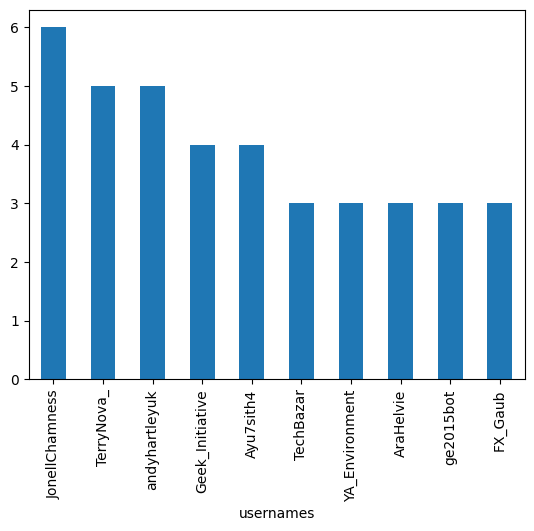

In [ ]:
df_final['usernames'].value_counts().head(10).plot(kind='bar')

In [ ]:
def analyze_sentiment(processed_df):
  sentiment_scores = []
  usernames_with_scores = []
  for entry in processed_data:
    tweet = entry["text"]
    username = entry["username"]
    result = sentiment_analysis(tweet)
    sentiment_scores.append(result[0]["label"])  # Extract sentiment label
    usernames_with_scores.append((username, result))

  cyberbullying_labels = []
  for username, score in usernames_with_scores:
    if score in cyberbullying_categories:
      label = cyberbullying_categories[score]
      if label == "threatening":
        threatening_usernames.append(username)
      else:
        label = cyberbullying_categories["NEGATIVE"]["others"]
    else:
      label = cyberbullying_categories["POSITIVE"]  # Adjust based on your definition of positive
    cyberbullying_labels.append(label)
  return sentiment_scores, cyberbullying_labels, threatening_usernames


##Threat Intimation

In [ ]:
# prompt: extract usernames and cyberbullying status alone into a df called df_mail

df_mail = df_final[["usernames", "Cyberbullying Status"]]


In [ ]:
df_mail

,usernames,Cyberbullying Status
0,sheezy0,cyberbullying
1,DavdBurnett,cyberbullying
2,lwtprettylaugh,cyberbullying
3,douggarland,cyberbullying
4,WilfordGemma,cyberbullying
...,...,...
1995,phenokage,cyberbullying
1996,Jwood907,cyberbullying
1997,7clarkyred,non cyberbullying
1998,LeeEliz,cyberbullying


### Threat Alert with Email

In [ ]:
from google.colab import userdata
mail_pass = userdata.get('mail_password')
sender = userdata.get('send_mail')
receiver = userdata.get('rec_mail')

In [ ]:
# Assuming 'df_final' contains the DataFrame you want to share
df_mail_string = df_final.to_string()

In [ ]:
df_mail_string

'            usernames Cyberbullying Status                                                                                                                                                                                                    tweet\n0             sheezy0        cyberbullying                                                                                                                        america another 8 years obamas ideology via hillary wed well way shithole country\n1         DavdBurnett        cyberbullying                                                                                                                   canadians never met seen associated person currently labelled retarded plan tu2026 url\n2      lwtprettylaugh        cyberbullying                                                                                                                                                                                   hahaha grow faggot url\n3         douggarla

In [ ]:
# prompt: share the df_final details to a email user
import smtplib

# Set up email credentials
sender_email = sender
sender_password = mail_pass
receiver_email =  receiver

# Create the email message
message = f"Subject: Cyberbullying Analysis Results\n\n{df_mail_string}"

# Send the email
with smtplib.SMTP("smtp.gmail.com", 587) as server:
    server.starttls()
    server.login(sender_email, sender_password)
    server.sendmail(sender_email, receiver_email, message)
print("Report Sent Successfully")


Report Sent Successfully


#### Tested for receiver 2


In [ ]:
sender_email = sender
sender_password = mail_pass
receiver_email =  "manoharsah2003@gmail.com"

# Create the email message
message = f"Subject: Cyberbullying Analysis Results\n\n{df_mail_string}"

# Send the email
with smtplib.SMTP("smtp.gmail.com", 587) as server:
    server.starttls()
    server.login(sender_email, sender_password)
    server.sendmail(sender_email, receiver_email, message)
print("Report Sent Successfully")

Report Sent Successfully


##Evaluation Metrics for the Dataset used w.r.t Model


In [ ]:
# prompt: Generate the precision , recall , accuracy and f1 score for the above model

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Assuming 'df_result' contains the DataFrame with 'sentiment_label' and 'Cyberbullying Status' columns

# Extract true labels and predicted labels
true_labels = Tfile['sentiment'].tolist()
predicted_labels = df_result['sentiment_label'].tolist()



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the true labels
le.fit(true_labels)

# Transform the true labels to numeric labels
true_labels_numeric = le.transform(true_labels)

# Calculate the performance metrics using the numeric labels
precision = precision_score(true_labels_numeric, predicted_labels)
recall = recall_score(true_labels_numeric, predicted_labels)
accuracy = accuracy_score(true_labels_numeric, predicted_labels)
f1 = f1_score(true_labels_numeric, predicted_labels)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Precision: 0.10197368421052631
Recall: 0.8378378378378378
Accuracy: 0.163
F1 Score: 0.1818181818181818


In [ ]:
# Transform the above results into a percentage

precision_percentage = precision * 100
recall_percentage = recall * 100
accuracy_percentage = accuracy * 100
f1_percentage = f1 * 100

# Print the results
print(f"Precision: {precision_percentage:.2f}%")
print(f"Recall: {recall_percentage:.2f}%")
print(f"Accuracy: {accuracy_percentage:.2f}%")
print(f"F1 Score: {f1_percentage:.2f}%")


Precision: 10.20%
Recall: 83.78%
Accuracy: 16.30%
F1 Score: 18.18%


In [ ]:
# prompt: convert the results into a dataframe

import pandas as pd

# Create a dictionary with the metrics and their values
metrics = {
    "Metric": ["Precision", "Recall", "Accuracy", "F1 Score"],
    "Value": [precision_percentage, recall_percentage, accuracy_percentage, f1_percentage]
}

# Create a pandas DataFrame from the dictionary
df_metrics = pd.DataFrame(metrics)

# Display the DataFrame
print(df_metrics.to_string())


      Metric      Value
0  Precision  10.197368
1     Recall  83.783784
2   Accuracy  16.300000
3   F1 Score  18.181818


###Optional Metrics

In [ ]:
import pandas as pd

# Assuming you already have the calculated values for precision, recall, and accuracy

# True Negatives
tn = (1 - accuracy) * (1 - recall)

# False Positives
fp = accuracy - precision * recall

# False Negatives
fn = recall - accuracy

# True Positives
tp = accuracy * precision

# Specificity
specificity = tn / (tn + fp)

# Additional Metrics DataFrame
data = {
    "Metric": ["True Negatives", "False Positives", "False Negatives", "True Positives", "Specificity"],
    "Value": [tn, fp, fn, tp, specificity]
}

df_metrics = pd.DataFrame(data)

# Print the DataFrame
print(df_metrics.to_string())


            Metric     Value
0   True Negatives  0.135730
1  False Positives  0.077563
2  False Negatives  0.674838
3   True Positives  0.016622
4      Specificity  0.636355
